In [83]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential

from keras import backend as k
from sklearn.model_selection import train_test_split
import tensorflow as tf

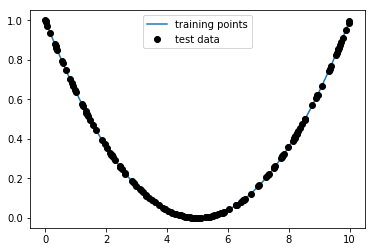

In [102]:
def f(x):
    # quadratic
    return ((x - 5)**2)/25.0

def df(x):
    # derivative of quadratic is linear
    return 2*(x - 5) / 25.0

# sample size
n = 1000
# these will be my training data sets, with regular sampling
x = np.linspace(0,10,n)
y = f(x)

# split train/val
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15)

# normalize
# x = x / 10

# get test data too, but randomly sampled
# x_test = 10*np.random.ranf(20)
# y_test = f(x_test)
# x_test = x_test / 10

plt.plot(x,y, label='training points')
plt.plot(x_val,y_val, 'ko', label='test data')
plt.legend()

In [109]:
model = Sequential()
# 1d input
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Activation("linear"))
model.add(Dense(32, activation='relu'))
model.add(Activation("linear"))
model.add(Dense(32, activation='relu'))
# 1d output
model.add(Dense(1))

# minimize mse
model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])


model.fit(x, y,
          batch_size=10,
          epochs=25,
          verbose=0,
          validation_data=(x_test, y_test))

## compute derivative (gradient)
session = k.get_session()
# session.run(tf.global_variables_initializer())
y_val_d_evaluated = session.run(tf.gradients(model.output, model.input), feed_dict={model.input: x_val.reshape(len(x_val), 1)})

print(y_val_d_evaluated)

[array([[ 0.10217768],
       [ 0.03517009],
       [-0.20952252],
       [ 0.27514195],
       [ 0.03517009],
       [-0.11752787],
       [-0.1638283 ],
       [ 0.27514195],
       [-0.28616786],
       [-0.24460346],
       [ 0.13441935],
       [ 0.29319322],
       [-0.20952252],
       [-0.11752787],
       [-0.03501771],
       [-0.11752787],
       [-0.20952252],
       [ 0.32416737],
       [ 0.13441935],
       [ 0.20627531],
       [-0.28301606],
       [-0.03501771],
       [-0.377501  ],
       [ 0.03517009],
       [ 0.03517009],
       [-0.34143054],
       [-0.01467784],
       [-0.11752787],
       [-0.01467784],
       [-0.20952252],
       [-0.20952252],
       [-0.32202864],
       [ 0.20627531],
       [-0.03501771],
       [ 0.03517009],
       [ 0.32416737],
       [ 0.03517009],
       [ 0.32416737],
       [ 0.32416737],
       [-0.03501771],
       [-0.01467784],
       [-0.11752787],
       [-0.11752787],
       [ 0.13441935],
       [ 0.32416737],
       [ 

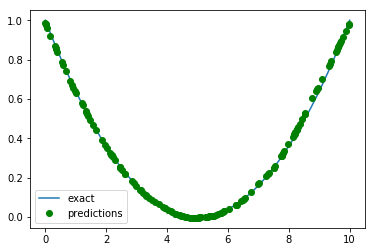

In [104]:
y_result = model.predict(x_val)
plt.plot(x,y, label='exact')
plt.plot(x_val, y_result, 'go', label='predictions')
plt.legend()

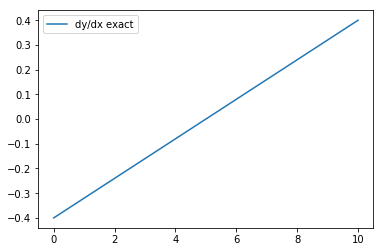

In [114]:
plt.plot(x, df(x), label='dy/dx exact')
plt.legend()

In [115]:
## compute derivative (gradient)
session = k.get_session()
# session.run(tf.global_variables_initializer())
y_val_d_evaluated = session.run(tf.gradients(model.output, model.input), feed_dict={model.input: x_val.reshape(len(x_val), 1)})

for i in range(10):
    print(x_val[i], '-', y_val_d_evaluated[0][i], '-', df(x_val[i]))

6.296296296296296 - [0.10217768] - 0.10370370370370367
5.495495495495495 - [0.03517009] - 0.03963963963963962
2.2922922922922924 - [-0.20952252] - -0.2166166166166166
8.178178178178179 - [0.27514195] - 0.2542542542542543
5.405405405405405 - [0.03517009] - 0.03243243243243242
3.853853853853854 - [-0.11752787] - -0.0916916916916917
0.0 - [-0.1638283] - -0.4
8.128128128128129 - [0.27514195] - 0.25025025025025033
0.5405405405405406 - [-0.28616786] - -0.3567567567567568
1.951951951951952 - [-0.24460346] - -0.24384384384384383


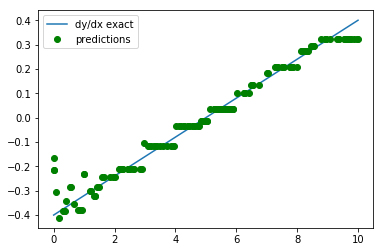

In [116]:
plt.plot(x, df(x), label='dy/dx exact')
plt.plot(x_val, y_val_d_evaluated[0], 'go', label='predictions')
plt.legend()

In [117]:
for i in range(len(x_val)):
    if x_val[i] > 3 and x_val[i] < 4:
        print(x_val[i], '-', y_val_d_evaluated[0][i], '-', df(x_val[i]))

3.853853853853854 - [-0.11752787] - -0.0916916916916917
3.943943943943944 - [-0.11752787] - -0.08448448448448449
3.133133133133133 - [-0.11752787] - -0.14934934934934938
3.2932932932932935 - [-0.11752787] - -0.13653653653653652
3.923923923923924 - [-0.11752787] - -0.08608608608608609
3.103103103103103 - [-0.11752787] - -0.15175175175175176
3.203203203203203 - [-0.11752787] - -0.14374374374374377
3.3233233233233235 - [-0.11752787] - -0.1341341341341341
3.3933933933933935 - [-0.11752787] - -0.12852852852852853
3.5035035035035036 - [-0.11752787] - -0.11971971971971972
3.6036036036036037 - [-0.11752787] - -0.11171171171171171
3.7237237237237237 - [-0.11752787] - -0.1021021021021021
